# Exploratory Data Analysis and Initial Model Creation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import scipy.stats as stats
import modeling
import data_viz
import data_cleaning
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV
%matplotlib inline
sns.set(font_scale=1.5)


In [2]:
df = pd.read_csv('datasets/train_cleaned.csv')
df_test = pd.read_csv('datasets/test_cleaned.csv')
modeling.test_columns(df=df, df_test=df_test)
target = 'saleprice'

In [3]:
df.shape

(2034, 81)

In [4]:
df_test.shape

(879, 80)

## Correlation chart to `saleprice`

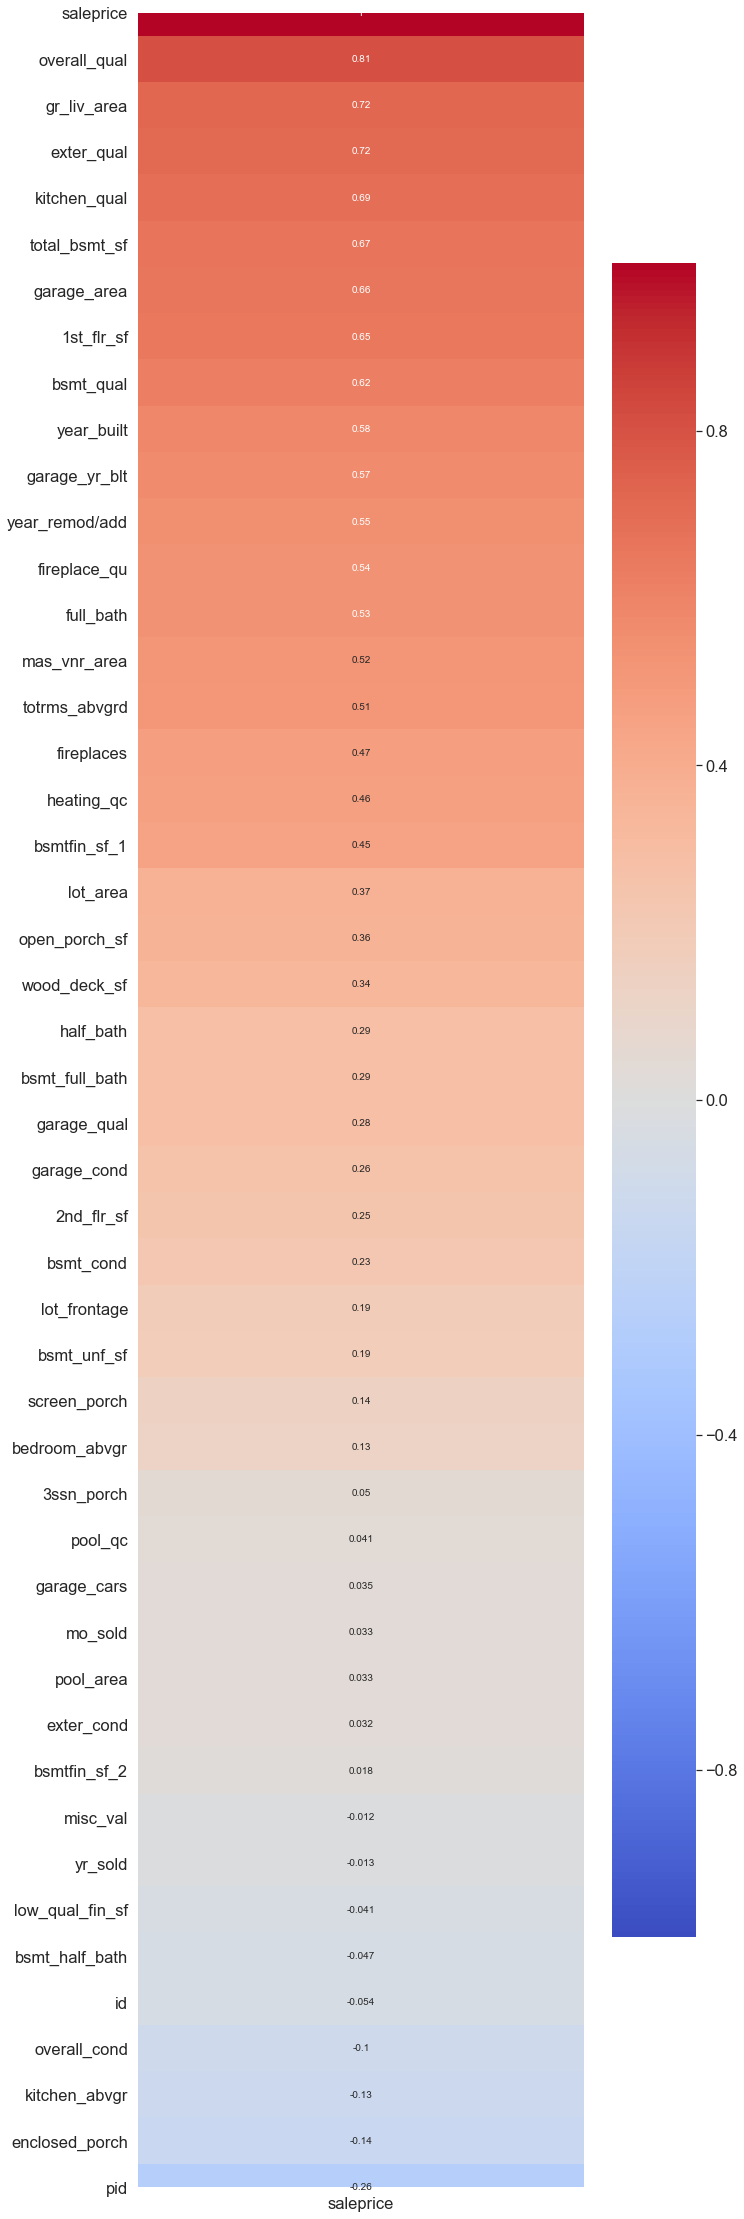

In [5]:
corr = df.corr()[['saleprice']].sort_values(by= 'saleprice', ascending=False)
plt.figure(figsize=(10,40))
sns.heatmap(corr,
           annot = True,
           cmap='coolwarm',
            vmax = 1,
            vmin = -1,
           );

We'll grab the columns with an absolute correlation of >= .3 first to set up a naive model as a baseline and see how it works.

In [6]:
df.corr()[['saleprice']].sort_values(by='saleprice', ascending=False) >= .3

,saleprice
saleprice,True
overall_qual,True
gr_liv_area,True
exter_qual,True
kitchen_qual,True
total_bsmt_sf,True
garage_area,True
1st_flr_sf,True
bsmt_qual,True
year_built,True


In [7]:
potential_model_columns = ['wood_deck_sf',
'open_porch_sf',
'bsmtfin_sf_1',
'heating_qc',
'fireplaces',
'mas_vnr_area',
'totrms_abvgrd',
'full_bath',
'fireplace_qu',
'year_remod/add',
'garage_yr_blt',
'year_built',
'bsmt_qual',
'1st_flr_sf',
'total_bsmt_sf',
'garage_area',
'kitchen_qual',
'gr_liv_area',
'exter_qual',
'overall_qual',
'lot_area']

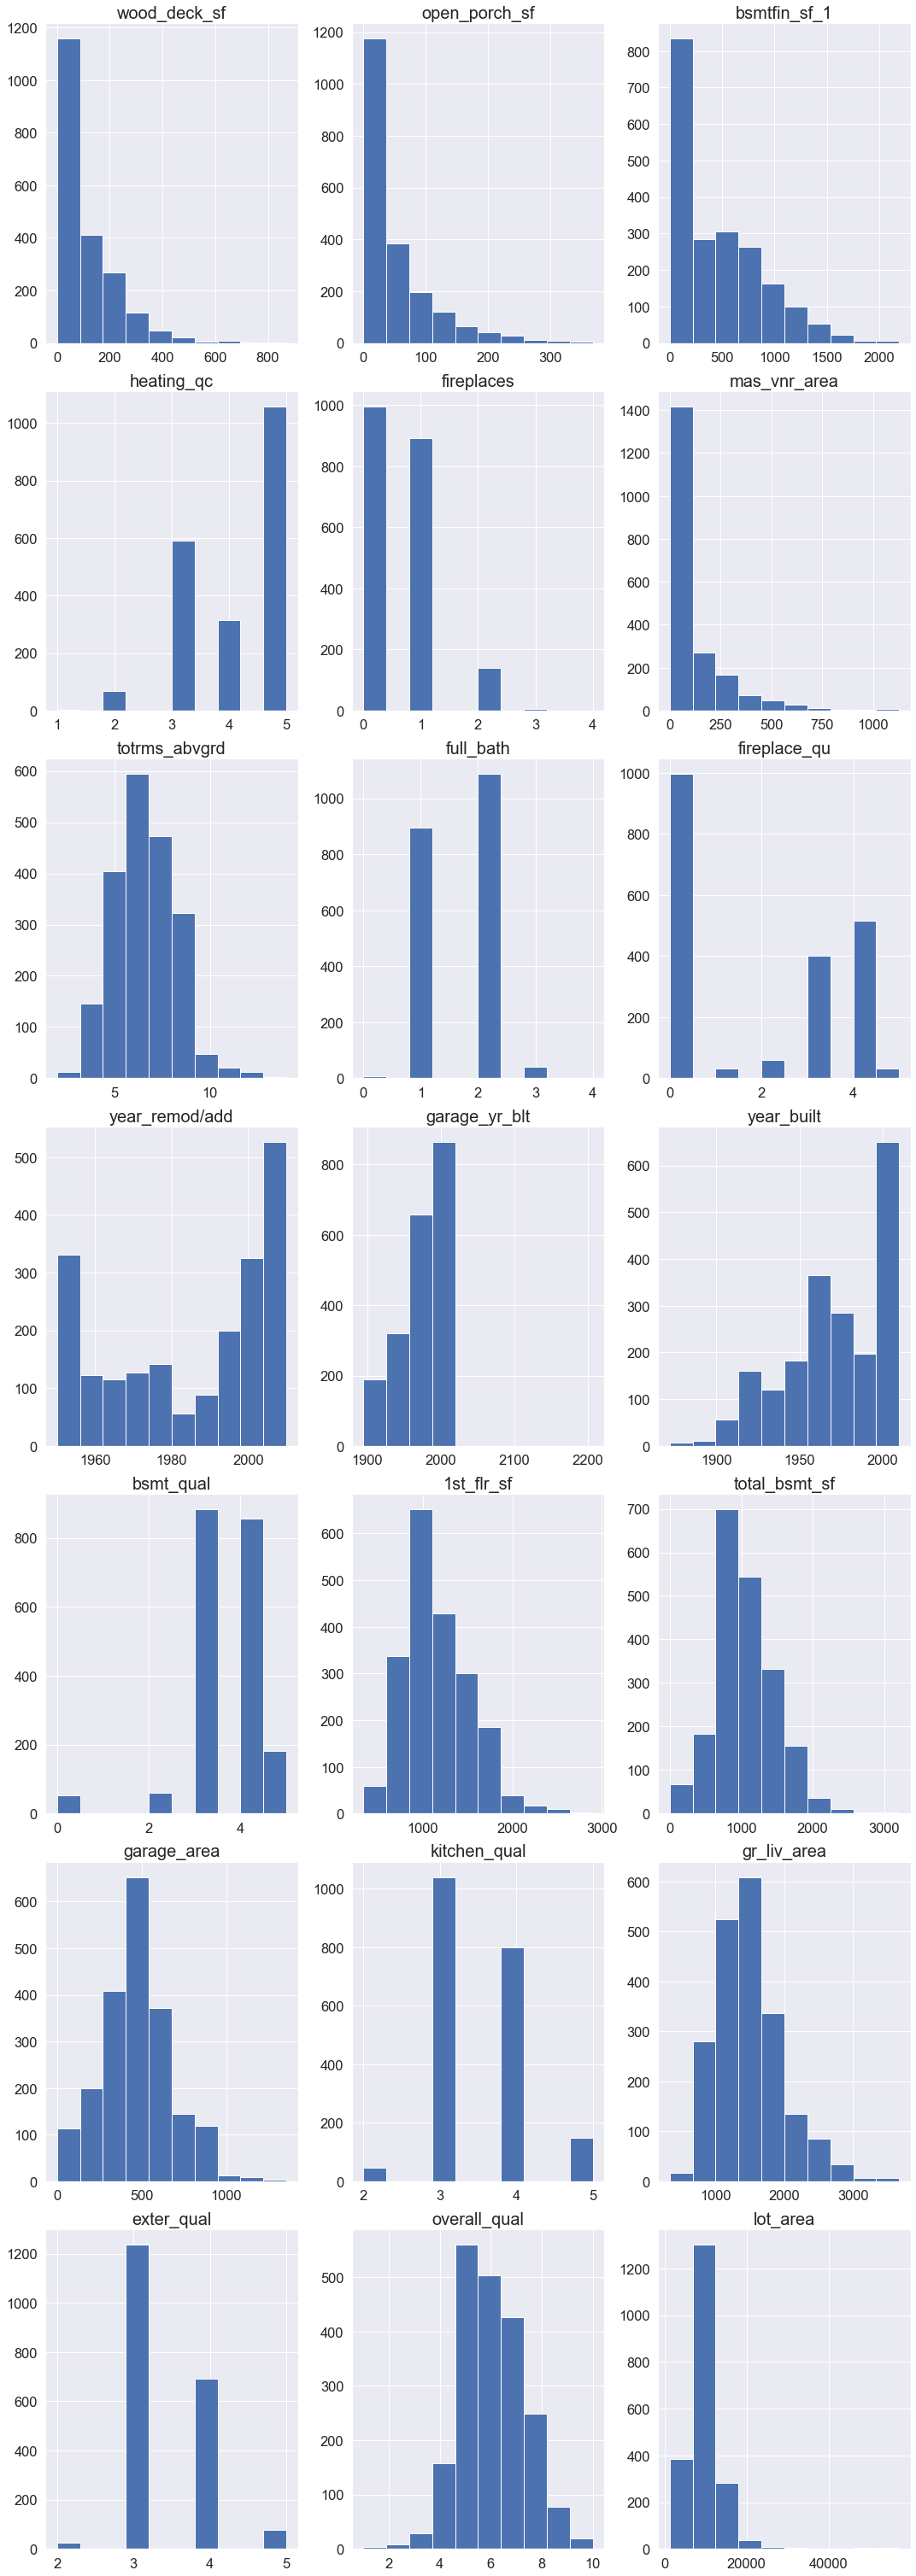

In [8]:
data_viz.subplot_dists(dataframe = df,
                      columns = potential_model_columns)

In [9]:
%store -r ordinal_columns
for col in ordinal_columns:
    try:
        potential_model_columns.remove(col)
    except:
        pass

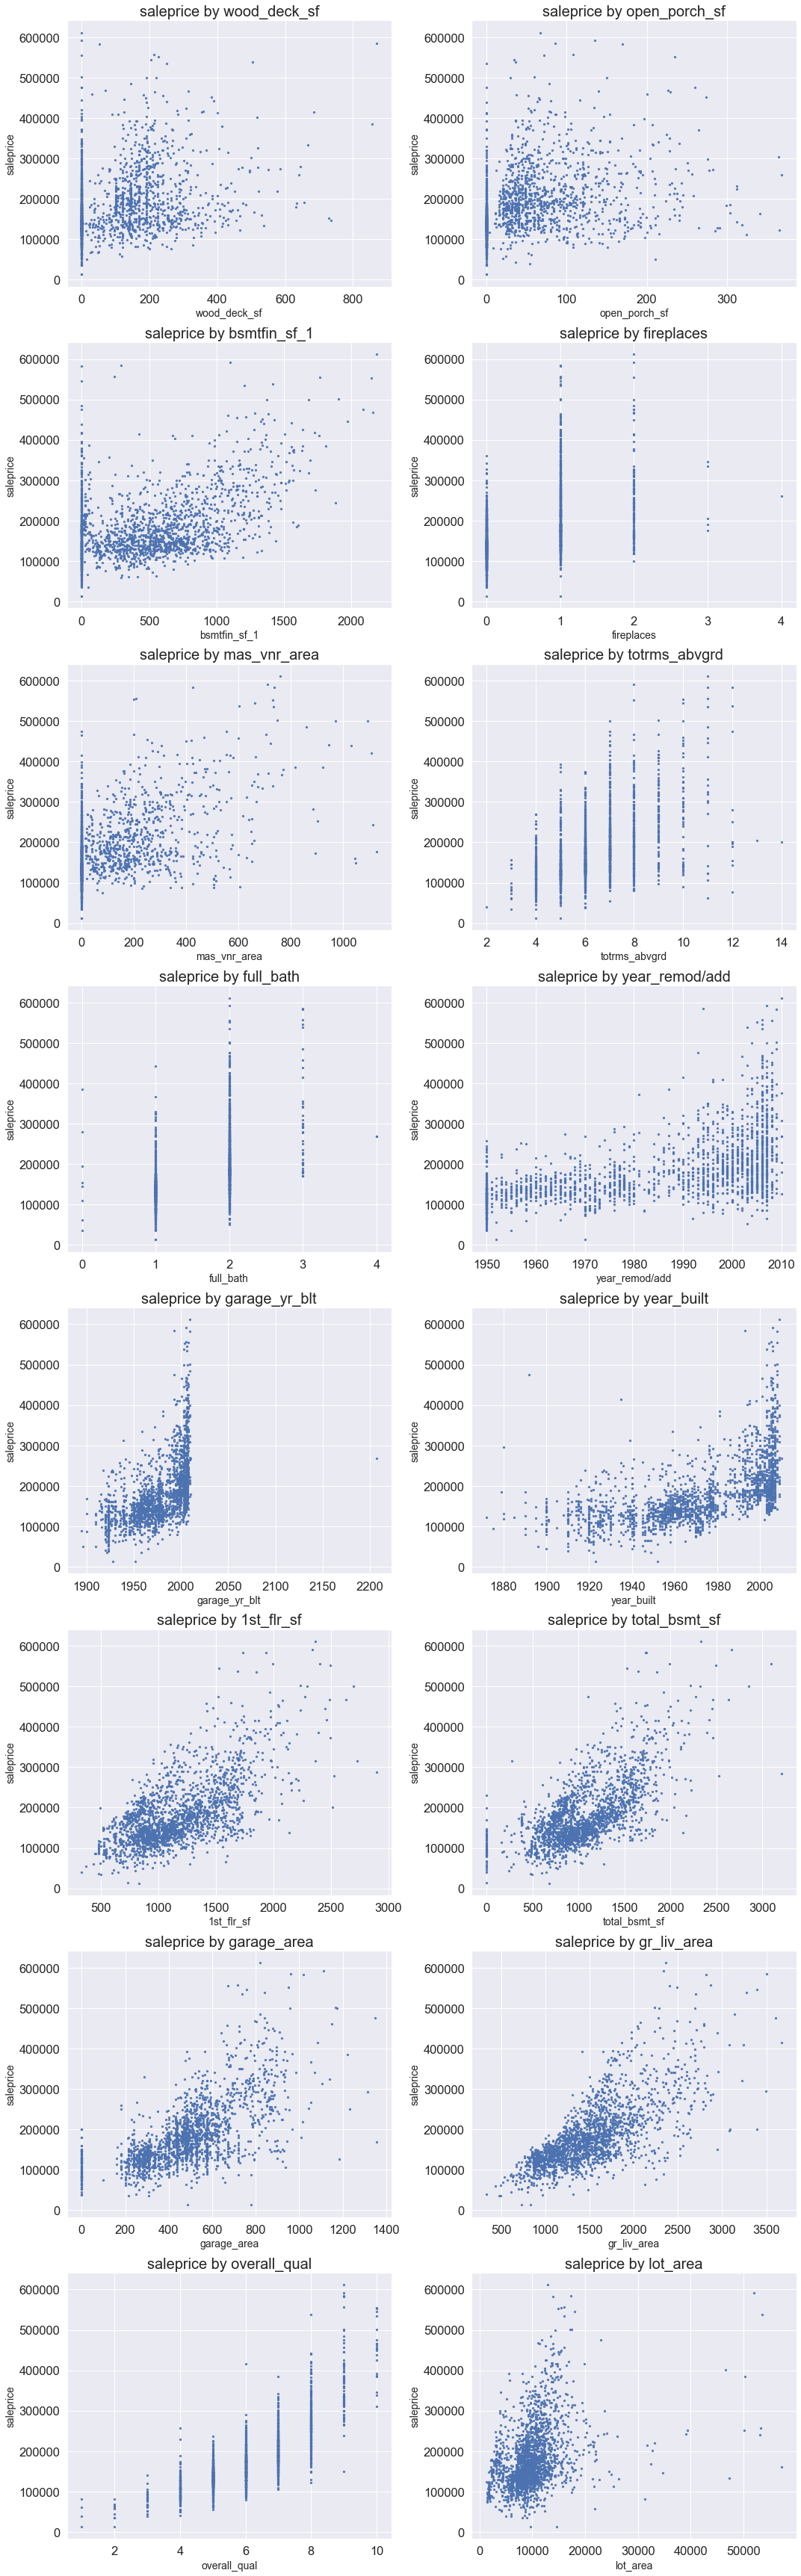

In [10]:
data_viz.subplot_scatterz(dataframe = df,
                         predict_variables = potential_model_columns,
                         target_variable = target)

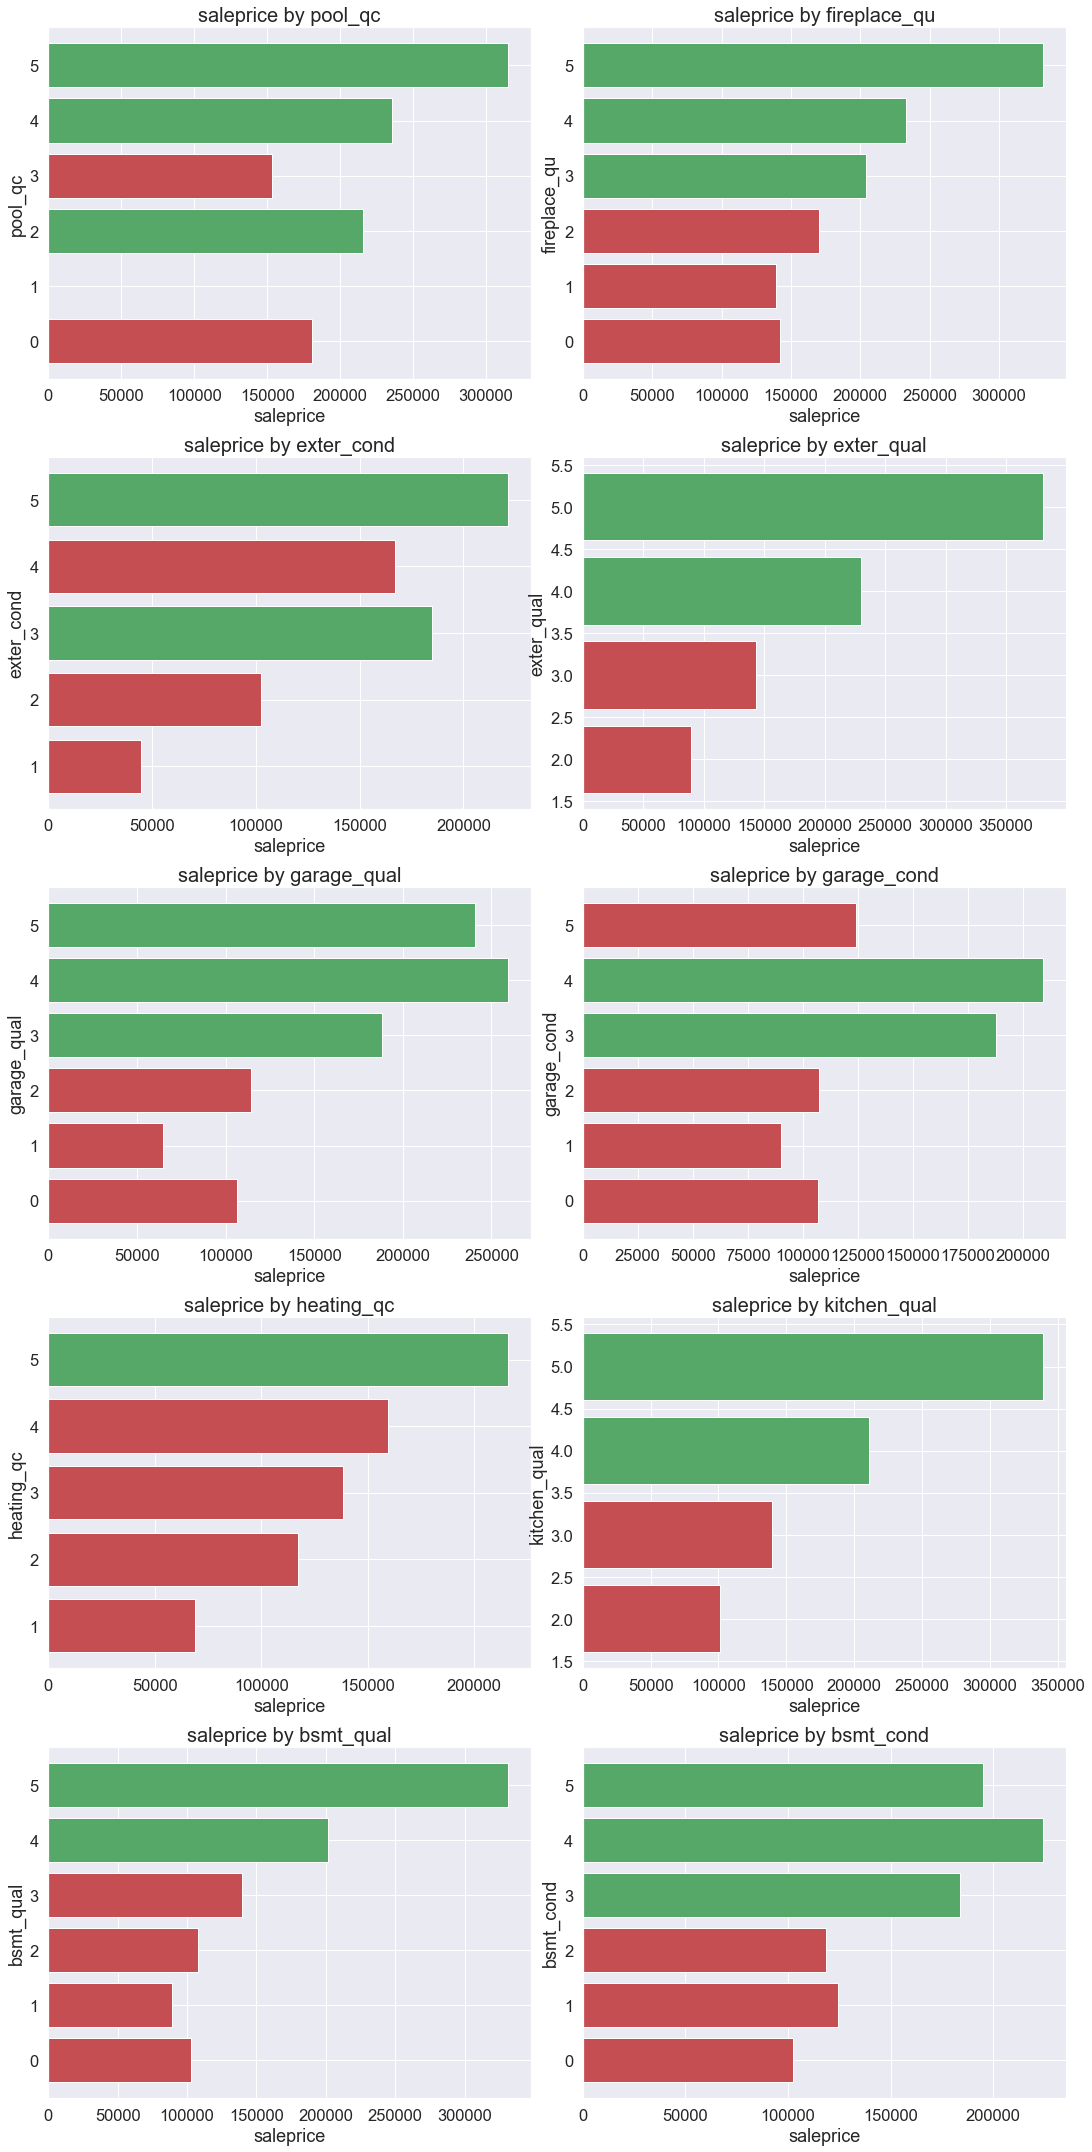

In [11]:

data_viz.graph_greater_than_mean(ordinal_columns,
                       df,
                       df['saleprice'].mean(),
                       target='saleprice')

## Start the modeling
Using some custom made functions, I am able to iterate through models using a function. You can see the code in `modeling.py`.

In [12]:
model_columns = {'model_id':0,
        'features_used':0,
        'target':0,
        'random_state':0,
        'model_type':0,
        'random_state':0,
        'scaled':0,
        'alpha':0,
        'coeffs':0,
        'train_score':0,
        'test_score':0,
        'cross_val_score':0,
        'output':0}

model_df = pd.DataFrame(data=model_columns, index=['model_id'])
model_df.set_index('model_id',inplace=True)
model_df

,features_used,target,random_state,model_type,scaled,alpha,coeffs,train_score,test_score,cross_val_score,output
model_id,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0


use those for our first model

In [13]:
features1 = ['wood_deck_sf',
'open_porch_sf',
'bsmtfin_sf_1',
'heating_qc',
'fireplaces',
'mas_vnr_area',
'totrms_abvgrd',
'full_bath',
'fireplace_qu',
'year_remod/add',
'garage_yr_blt',
'year_built',
'bsmt_qual',
'1st_flr_sf',
'total_bsmt_sf',
'garage_area',
'kitchen_qual',
'gr_liv_area',
'exter_qual',
'overall_qual',
'lot_area']

target = 'saleprice'
model_df = modeling.new_test(df = df,
        test_df = df_test,
        features = features1,
        target = target,
         random_state = 1,
         model_type = LinearRegression,
         model_df = model_df,
        scaled=False,
        )

Training Data Score: 0.8890900111917521
Test Data Score: 0.8370283628053425
Cross Validation Score: 0.8828173190851727


In [14]:
import statsmodels.api as sm
y = df['saleprice']
ols_X = sm.add_constant(df[features1])
model1_ols = sm.OLS(y,ols_X).fit()
model1_ols.summary()

/Users/justinaugust/.conda/envs/dsi/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     700.3
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:26:00   Log-Likelihood:                -23672.
No. Observations:                2034   AIC:                         4.739e+04
Df Residuals:                    2012   BIC:                         4.751e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.998e+05      1e+05     -5.995      0.000   -7.96e+05   -4.04e+05
wood_deck_sf      14.6186      5.352      2.732      0.006       4.123      25.114
open_porch_sf     16.5159     10.885      1.517      0.129      -4.831      37.862
bsmtfin_sf_1      23.6639      1.707     13.859      0.000      20.315      27.012
heating_qc      1947.0526    818.509      2.379      0.017     341.839    3552.266
fireplaces     -1362.3478   2025.385     -0.673      0.501   -5334.419    2609.724
mas_vnr_area      35.7006      4.286      8.329      0.000      27.294      44.107
totrms_abvgrd    622.5435    709.483      0.877      0.380    -768.854    2013.941
full_bath      -5262.4880   1657.070     -3.176      0.002   -8512.241   -2012.735
fireplace_qu    2511.0191    718.717      3.494      0.000    1101.512    3920.526
year_remod/add   162.0856     45.893      3.532      0.000      72.083     252.088
garage_yr_blt    -92.8754     45.685     -2.033      0.042    -182.469      -3.281
year_built       162.2937     39.285      4.131      0.000      85.251     239.336
bsmt_qual       2848.6475   1175.748      2.423      0.015     542.836    5154.459
1st_flr_sf         9.5288      3.492      2.728      0.006       2.680      16.378
total_bsmt_sf     12.4455      3.218      3.867      0.000       6.135      18.756
garage_area       29.9756      4.580      6.545      0.000      20.994      38.957
kitchen_qual    1.114e+04   1508.438      7.386      0.000    8182.721    1.41e+04
gr_liv_area       44.3105      2.955     14.994      0.000      38.515      50.106
exter_qual      1.692e+04   1852.423      9.133      0.000    1.33e+04    2.06e+04
overall_qual    1.188e+04    834.544     14.235      0.000    1.02e+04    1.35e+04
lot_area           1.6134      0.147     10.943      0.000       1.324       1.903
==============================================================================
Omnibus:                      530.431   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6944.864
Skew:                           0.850   Prob(JB):                         0.00
Kurtosis:                      11.891   Cond. No.                     1.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Toss out based on p-values:

    - `total_bsmt_sf`
    - `fireplaces`
    - `year_remod/add`
    - `totrms_abvgrd`

Combine with other similar columns to create new features.

    - `open_porch_sf`
    - `full_bath`    

In [15]:
df['porches'] = df['open_porch_sf'] * df['wood_deck_sf']
df_test['porches'] = df_test['open_porch_sf'] * df_test['wood_deck_sf']
df['baths'] = df['full_bath'] * df['half_bath']
df_test['baths'] = df_test['full_bath'] * df_test['half_bath']

In [16]:
features2 = [
'bsmtfin_sf_1',
'heating_qc',
'mas_vnr_area',
'fireplace_qu',
'garage_yr_blt',
'year_built',
'bsmt_qual',
'1st_flr_sf',
'garage_area',
'kitchen_qual',
'gr_liv_area',
'exter_qual',
'overall_qual',
'porches',
'baths',
'open_porch_sf',
'full_bath',
]

target = 'saleprice'


model_df = modeling.new_test(df = df,
        test_df = df_test,
        features = features2,
        target = target,
         random_state = 1,
         model_type = LinearRegression,
         model_df = model_df,
        scaled=False,
        )
ols_X = sm.add_constant(df[features2])
model2_ols = sm.OLS(y,ols_X).fit()
model2_ols.summary()

Training Data Score: 0.8822960745004197
Test Data Score: 0.8252132069254332
Cross Validation Score: 0.878179227485506


/Users/justinaugust/.conda/envs/dsi/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     807.4
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:26:00   Log-Likelihood:                -23735.
No. Observations:                2034   AIC:                         4.751e+04
Df Residuals:                    2016   BIC:                         4.761e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.737e+05   8.04e+04     -2.162      0.031   -3.31e+05   -1.62e+04
bsmtfin_sf_1     25.0801      1.694     14.802      0.000      21.757      28.403
heating_qc     3091.7836    818.932      3.775      0.000    1485.742    4697.825
mas_vnr_area     33.1676      4.402      7.534      0.000      24.534      41.801
fireplace_qu   2230.2442    423.046      5.272      0.000    1400.591    3059.897
garage_yr_blt  -107.1866     46.145     -2.323      0.020    -197.682     -16.691
year_built      119.6481     42.649      2.805      0.005      36.007     203.290
bsmt_qual      5361.1014   1038.737      5.161      0.000    3323.991    7398.212
1st_flr_sf       30.9464      2.893     10.697      0.000      25.273      36.620
garage_area      38.9466      4.616      8.437      0.000      29.893      48.000
kitchen_qual   1.189e+04   1519.691      7.827      0.000    8914.296    1.49e+04
gr_liv_area      42.3095      2.751     15.378      0.000      36.914      47.705
exter_qual      1.71e+04   1896.824      9.015      0.000    1.34e+04    2.08e+04
overall_qual   1.105e+04    848.605     13.018      0.000    9382.584    1.27e+04
porches           0.2826      0.067      4.249      0.000       0.152       0.413
baths          3848.5016   1091.420      3.526      0.000    1708.073    5988.931
open_porch_sf     0.6490     11.960      0.054      0.957     -22.806      24.104
full_bath     -4758.7967   1686.997     -2.821      0.005   -8067.235   -1450.358
==============================================================================
Omnibus:                      549.427   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6168.204
Skew:                           0.941   Prob(JB):                         0.00
Kurtosis:                      11.321   Cond. No.                     1.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What other combinations make sense?

In [17]:
df['lot'] = df['lot_frontage'] * df['lot_area']
df['overall'] = df['overall_qual'] * df['overall_cond']
df['sq_ft'] = df['bsmtfin_sf_1'] * df['bsmtfin_sf_2'] * df['1st_flr_sf'] * df['2nd_flr_sf']

df_test['lot'] = df_test['lot_frontage'] * df_test['lot_area']
df_test['overall'] = df_test['overall_qual'] * df_test['overall_cond']
df_test['sq_ft'] = df_test['bsmtfin_sf_1'] * df_test['bsmtfin_sf_2'] * df_test['1st_flr_sf'] * df_test['2nd_flr_sf']

In [18]:
features3 = ['bsmtfin_sf_1',
'heating_qc',
'mas_vnr_area',
'fireplace_qu',
'year_built',
'bsmt_qual',
'1st_flr_sf',
'garage_area',
'kitchen_qual',
'gr_liv_area',
'exter_qual',
'overall_qual',
'porches',
'baths',
'open_porch_sf',
'full_bath',
'lot',
'overall',
'sq_ft',
'baths',
'lot_area',
'lot_frontage',
'overall_cond',
'bsmtfin_sf_1',
'bsmtfin_sf_2',
'2nd_flr_sf',
'half_bath',
]
target = 'saleprice'

model_df = modeling.new_test(df = df,
        test_df = df_test,
        features = features3,
        target = target,
         random_state = 1,
         model_type = LinearRegression,
         model_df = model_df,
        scaled=False,
        );
ols_X = sm.add_constant(df[features3])
model3_ols = sm.OLS(y,ols_X).fit()
model3_ols.summary()

Training Data Score: 0.8969926943483488
Test Data Score: 0.8371721322745975
Cross Validation Score: 0.8889901583710816


/Users/justinaugust/.conda/envs/dsi/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     634.5
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:26:00   Log-Likelihood:                -23602.
No. Observations:                2034   AIC:                         4.726e+04
Df Residuals:                    2008   BIC:                         4.740e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.452e+05   6.94e+04     -7.859      0.000   -6.81e+05   -4.09e+05
bsmtfin_sf_1     12.2147      0.808     15.114      0.000      10.630      13.800
heating_qc     1941.0578    780.677      2.486      0.013     410.037    3472.079
mas_vnr_area     35.8597      4.144      8.654      0.000      27.734      43.986
fireplace_qu   1973.5712    398.598      4.951      0.000    1191.862    2755.280
year_built      200.8957     36.557      5.495      0.000     129.202     272.589
bsmt_qual      5622.5966    979.791      5.739      0.000    3701.083    7544.111
1st_flr_sf       37.2533     12.229      3.046      0.002      13.270      61.237
garage_area      22.5791      3.790      5.958      0.000      15.146      30.012
kitchen_qual   1.087e+04   1436.926      7.563      0.000    8049.264    1.37e+04
gr_liv_area      28.9792     11.852      2.445      0.015       5.736      52.222
exter_qual     1.764e+04   1788.161      9.862      0.000    1.41e+04    2.11e+04
overall_qual   9280.2618   2360.150      3.932      0.000    4651.664    1.39e+04
porches           0.1884      0.063      2.983      0.003       0.065       0.312
baths          6518.1493   1032.820      6.311      0.000    4492.639    8543.660
open_porch_sf     4.1506     11.245      0.369      0.712     -17.903      26.204
full_bath     -7993.4071   1859.140     -4.300      0.000   -1.16e+04   -4347.362
lot               0.0172      0.003      5.095      0.000       0.011       0.024
overall         384.5382    414.090      0.929      0.353    -427.553    1196.629
sq_ft          2.206e-08   1.64e-08      1.346      0.179   -1.01e-08    5.42e-08
baths          6518.1493   1032.820      6.311      0.000    4492.639    8543.660
lot_area          0.7842      0.193      4.068      0.000       0.406       1.162
lot_frontage    -68.9769     44.887     -1.537      0.125    -157.006      19.052
overall_cond   2190.2306   2308.622      0.949      0.343   -2337.315    6717.776
bsmtfin_sf_1     12.2155      0.808     15.114      0.000      10.631      13.801
bsmtfin_sf_2      5.0301      3.938      1.277      0.202      -2.692      12.752
2nd_flr_sf       13.1758     12.043      1.094      0.274     -10.441      36.793
half_bath     -1.981e+04   3471.783     -5.706      0.000   -2.66e+04    -1.3e+04
==============================================================================
Omnibus:                      490.470   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5186.401
Skew:                           0.823   Prob(JB):                         0.00
Kurtosis:                      10.648   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

The remaining features all have appropriate P-values or are contained within other values and need to be kept. 

# Looping back EDA 

## Is `saleprice` regularly distributed?

/Users/justinaugust/.conda/envs/dsi/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


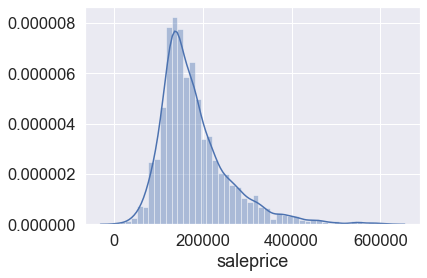

In [19]:
sns.distplot(df['saleprice']);

It's not - let's try the `log` of `saleprice` and see if it is more regularly distributed.

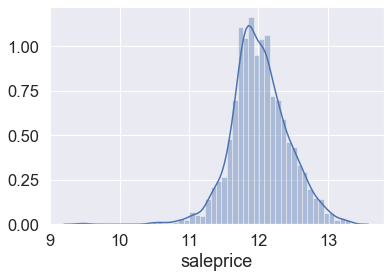

In [20]:
sns.distplot(np.log(df['saleprice']));

In [21]:
df['logsaleprice'] = np.log(df['saleprice'])

## What other variables might be appropriate to transform?

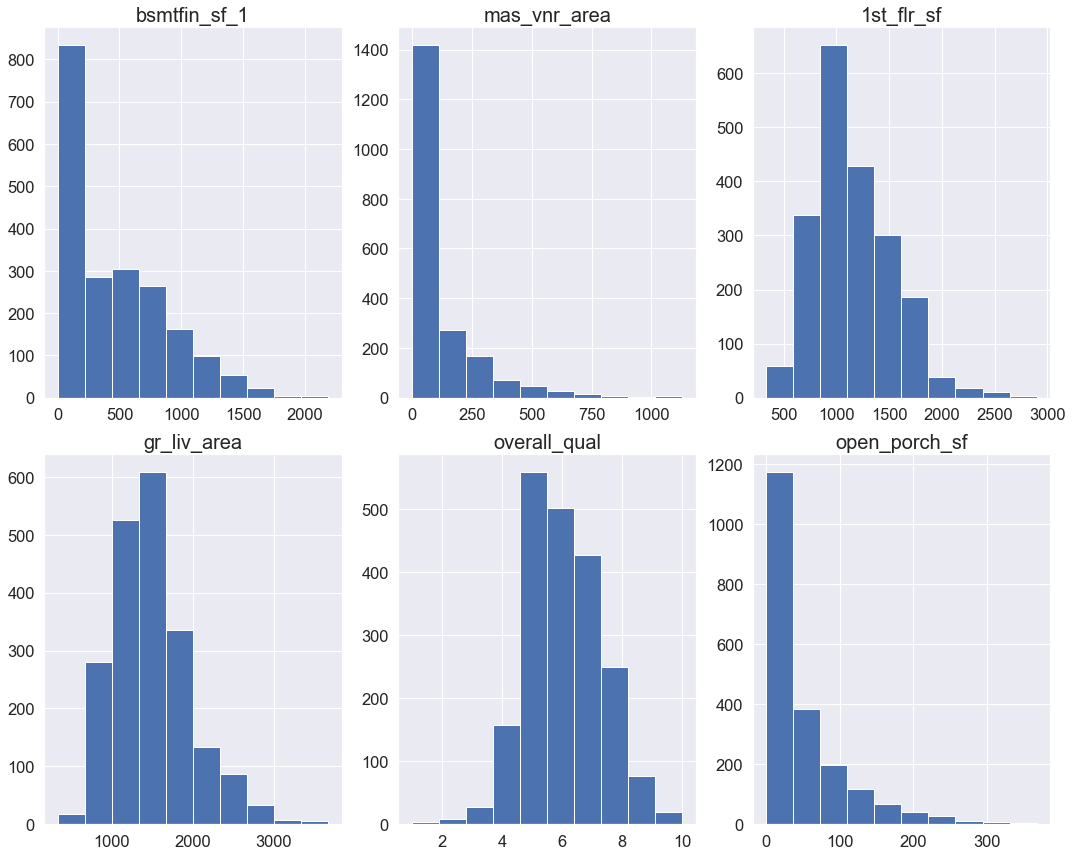

In [22]:
potential_logs = ['bsmtfin_sf_1',
    'mas_vnr_area',
    '1st_flr_sf',
    'gr_liv_area',
    'overall_qual',
    'open_porch_sf',
                 ]

data_viz.subplot_dists(dataframe=df,
                      columns = potential_logs
                      )

In [23]:
#cribbed from https://stackoverflow.com/a/52209380
df[potential_logs] = np.log(df[potential_logs],
                            out=np.zeros_like(df[potential_logs]),
                            where=(df[potential_logs]!=0))

df_test[potential_logs] = np.log(df_test[potential_logs],
                            out=np.zeros_like(df_test[potential_logs]),
                            where=(df_test[potential_logs]!=0))


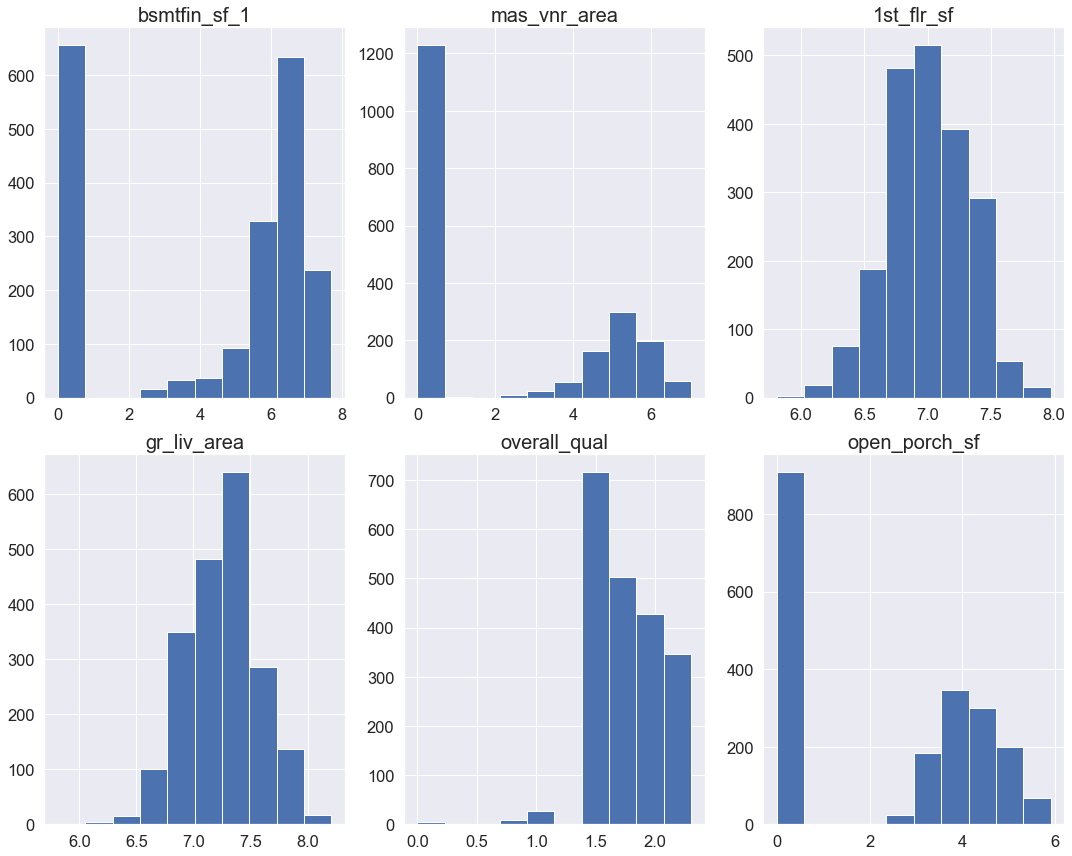

In [24]:
data_viz.subplot_dists(dataframe = df,
                      columns = df[potential_logs].columns
                      );

## We have a more regular distribution in target and in features, so using them may result in a better model fit.

In [25]:
features4 = ['bsmtfin_sf_1',
'heating_qc',
'mas_vnr_area',
'fireplace_qu',
'year_built',
'bsmt_qual',
'1st_flr_sf',
'garage_area',
'kitchen_qual',
'gr_liv_area',
'exter_qual',
'overall_qual',
'porches',
'baths',
'open_porch_sf',
'full_bath',
'lot',
'overall',
'sq_ft',
'baths',
'lot_area',
'lot_frontage',
'overall_cond',
'bsmtfin_sf_1',
'bsmtfin_sf_2',
'2nd_flr_sf',
'half_bath',
]

target = 'logsaleprice'

model_df = modeling.new_test(df = df,
        test_df = df_test,
        features = features4,
        target = target,
         random_state = 1,
         model_type = LinearRegression,
         model_df = model_df,
        scaled=False,
        );
y=df[target]
ols_X = sm.add_constant(df[features4])
model4_ols = sm.OLS(y,ols_X).fit()
model4_ols.summary()

Training Data Score: 0.9056826572204479
Test Data Score: 0.8797530963410817
Cross Validation Score: 0.9003794812413364


/Users/justinaugust/.conda/envs/dsi/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logsaleprice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     729.6
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:26:09   Log-Likelihood:                 1279.4
No. Observations:                2034   AIC:                            -2507.
Df Residuals:                    2008   BIC:                            -2361.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9681      0.388      5.076      0.000       1.208       2.728
bsmtfin_sf_1      0.0074      0.001     13.578      0.000       0.006       0.008
heating_qc        0.0221      0.004      5.811      0.000       0.015       0.030
mas_vnr_area     -0.0002      0.001     -0.152      0.879      -0.003       0.002
fireplace_qu      0.0141      0.002      7.235      0.000       0.010       0.018
year_built        0.0025      0.000     14.162      0.000       0.002       0.003
bsmt_qual         0.0359      0.005      7.502      0.000       0.027       0.045
1st_flr_sf        0.2633      0.032      8.191      0.000       0.200       0.326
garage_area       0.0001   1.84e-05      7.311      0.000    9.84e-05       0.000
kitchen_qual      0.0390      0.007      5.570      0.000       0.025       0.053
gr_liv_area       0.2107      0.041      5.100      0.000       0.130       0.292
exter_qual        0.0499      0.009      5.760      0.000       0.033       0.067
overall_qual      0.3511      0.037      9.546      0.000       0.279       0.423
porches        7.825e-07      3e-07      2.612      0.009    1.95e-07    1.37e-06
baths             0.0037      0.005      0.702      0.483      -0.007       0.014
open_porch_sf    -0.0005      0.002     -0.319      0.750      -0.004       0.003
full_bath         0.0023      0.009      0.245      0.806      -0.016       0.021
lot            6.692e-08   1.65e-08      4.045      0.000    3.45e-08    9.94e-08
overall           0.0008      0.001      0.659      0.510      -0.002       0.003
sq_ft          -5.41e-14      8e-14     -0.677      0.499   -2.11e-13    1.03e-13
baths             0.0037      0.005      0.702      0.483      -0.007       0.014
lot_area       5.195e-06   9.43e-07      5.508      0.000    3.35e-06    7.04e-06
lot_frontage     -0.0004      0.000     -1.902      0.057      -0.001    1.29e-05
overall_cond      0.0440      0.007      6.208      0.000       0.030       0.058
bsmtfin_sf_1      0.0074      0.001     13.579      0.000       0.006       0.008
bsmtfin_sf_2   4.373e-06    1.9e-05      0.230      0.818   -3.29e-05    4.17e-05
2nd_flr_sf     9.218e-05   2.68e-05      3.438      0.001    3.96e-05       0.000
half_bath        -0.0063      0.018     -0.355      0.723      -0.041       0.029
==============================================================================
Omnibus:                      916.038   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21914.518
Skew:                          -1.573   Prob(JB):                         0.00
Kurtosis:                      18.770   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

`mas_vnr_area` and `'bsmtfin_sf_2'` now appear to be not be effective. What about adding `total_bsmt_sf`,  `fireplaces`, `year_remod/add` back into the model?

In [26]:
features5 = ['bsmtfin_sf_1',
'heating_qc',
'fireplace_qu',
'year_built',
'bsmt_qual',
'1st_flr_sf',
'garage_area',
'kitchen_qual',
'gr_liv_area',
'exter_qual',
'overall_qual',
'porches',
'baths',
'open_porch_sf',
'full_bath',
'lot',
'overall',
'sq_ft',
'baths',
'lot_area',
'lot_frontage',
'overall_cond',
'bsmtfin_sf_1',
'2nd_flr_sf',
'half_bath',
'total_bsmt_sf',
'fireplaces',
'year_remod/add'
]

target = 'logsaleprice'

model_df = modeling.new_test(df = df,
        test_df = df_test,
        features = features5,
        target = target,
         random_state = 1,
         model_type = LinearRegression,
         model_df = model_df,
        scaled=False,
        );
y=df[target]
ols_X = sm.add_constant(df[features5])
model5_ols = sm.OLS(y,ols_X).fit()
model5_ols.summary()

Training Data Score: 0.9077538211607606
Test Data Score: 0.8830615390901566
Cross Validation Score: 0.9023449327598267


/Users/justinaugust/.conda/envs/dsi/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logsaleprice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     719.2
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:26:10   Log-Likelihood:                 1302.7
No. Observations:                2034   AIC:                            -2551.
Df Residuals:                    2007   BIC:                            -2400.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4508      0.492      2.949      0.003       0.486       2.416
bsmtfin_sf_1       0.0067      0.001     12.363      0.000       0.006       0.008
heating_qc         0.0198      0.004      5.175      0.000       0.012       0.027
fireplace_qu       0.0086      0.003      2.548      0.011       0.002       0.015
year_built         0.0025      0.000     13.588      0.000       0.002       0.003
bsmt_qual          0.0187      0.005      3.446      0.001       0.008       0.029
1st_flr_sf         0.2158      0.033      6.598      0.000       0.152       0.280
garage_area        0.0001   1.82e-05      7.206      0.000    9.53e-05       0.000
kitchen_qual       0.0376      0.007      5.338      0.000       0.024       0.051
gr_liv_area        0.1814      0.041      4.417      0.000       0.101       0.262
exter_qual         0.0465      0.009      5.390      0.000       0.030       0.063
overall_qual       0.3533      0.036      9.704      0.000       0.282       0.425
porches         7.429e-07   2.96e-07      2.507      0.012    1.62e-07    1.32e-06
baths              0.0037      0.005      0.719      0.472      -0.006       0.014
open_porch_sf     -0.0007      0.002     -0.427      0.670      -0.004       0.003
full_bath         -0.0022      0.009     -0.238      0.812      -0.021       0.016
lot             6.704e-08   1.64e-08      4.096      0.000    3.49e-08    9.91e-08
overall            0.0005      0.001      0.365      0.715      -0.002       0.003
sq_ft          -6.414e-14   7.51e-14     -0.854      0.393   -2.11e-13    8.32e-14
baths              0.0037      0.005      0.719      0.472      -0.006       0.014
lot_area          4.9e-06   9.39e-07      5.220      0.000    3.06e-06    6.74e-06
lot_frontage      -0.0005      0.000     -2.119      0.034      -0.001   -3.42e-05
overall_cond       0.0441      0.007      6.236      0.000       0.030       0.058
bsmtfin_sf_1       0.0067      0.001     12.364      0.000       0.006       0.008
2nd_flr_sf         0.0001   2.69e-05      4.536      0.000    6.92e-05       0.000
half_bath         -0.0083      0.018     -0.471      0.638      -0.043       0.026
total_bsmt_sf   8.799e-05   1.43e-05      6.157      0.000       6e-05       0.000
fireplaces         0.0216      0.010      2.273      0.023       0.003       0.040
year_remod/add     0.0005      0.000      2.406      0.016      0.0001       0.001
==============================================================================
Omnibus:                      962.512   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25645.029
Skew:                          -1.655   Prob(JB):                         0.00
Kurtosis:                      20.078   Cond. No.                     1.00e+16
================================

In [27]:
data_cleaning.snake_df(df)
data_cleaning.snake_df(df_test)
modeling.test_columns(df, df_test)
df.to_csv('datasets/train_cleaned.csv', index=False)
df_test.to_csv('datasets/test_cleaned.csv', index=False)
model_df.to_csv('datasets/models.csv')

In [28]:
%store features5

Stored 'features5' (list)


### All of our features now have appropriate p-values or are part of interaction variables.
### Now we'll explore how the non-number categorial variables can affect our model.

## On to the [Categorical Variables]('3_Categoricals.ipynb')